In [1]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.Logistic_regression import *
from Functions.Models.evaluation import *

## Connection to databse

In [2]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
155


## Data cleaning

In [3]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'


## Creating new columns for features 

In [4]:
class_area(alertP1)
text_length(alertP1)
referral_steps(alertP1)
speciality(alertP1)
alertP1=unit(alertP1)
alertP1=alertP1.sort_values('trata data recusa')
alertP1

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['step'][alertP1['step']>=3]='3+'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['unit'][alertP1['TIPO_UNID']!='CS/USF']='HOSP'


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,resume saída,mês_saida,ano_saida,Texto,result,area,text_length,step,speciality_type,unit
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,unknown,,unknown,...,01/08/2012,8,2012,,1,outside area,0,1,General Neurology,HOSP
3203,CZAEGS,BMNJDBJ,LOHHHOLT,,0,,OUTRA,unknown,,unknown,...,23/01/2012,1,2012,,1,outside area,0,1,Other specialities,HOSP
8620,EZDFGG,BEVIMVIL,LOHHHOQO,,0,,OUTRA,unknown,,unknown,...,04/01/2012,1,2012,,0,outside area,0,1,General Neurology,HOSP
3717,BZGBFZ,VVMBENJE,LOHHHTTH,,0,,OUTRA,unknown,,unknown,...,05/01/2012,1,2012,,0,outside area,0,1,General Neurology,HOSP
9316,ASBZH,BDVCNMLN,LOHHHRVP,,0,,OUTRA,unknown,,unknown,...,05/01/2012,1,2012,,0,outside area,0,1,General Neurology,HOSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,ECEHHF,VMNMMBEE,LSHVLHRS,,0,,OUTRA,SAM,3,Normal,...,02/03/2018,3,2018,,1,outside area,0,1,General Neurology,HOSP
6398,FFCAE,BIJIILBC,LSHTULLS,,0,,OUTRA,SAM,3,Normal,...,09/03/2018,3,2018,,1,outside area,0,1,General Neurology,HOSP
154,SFFEEE,LLMMCM,LSHSQQPU,,0,,OUTRA,SAM,3,Normal,...,15/06/2018,6,2018,Tonturas. EN normal. TC CE mostrando diversas ...,1,outside area,95,1,Other specialities,HOSP
6664,ZZCDCG,BMJMICVB,LSHTORSQ,,0,,OUTRA,SAM,3,Normal,...,04/05/2018,5,2018,,1,outside area,0,2,General Neurology,HOSP


## structured data with dummies

In [29]:
data=structured_data_dummies(alertP1)
print(data.columns)
data

Index([          'ID_DOENTE',            'PROCESSO',      'COD_REFERENCIA',
                    'COD_PZ', 'COD_UNID_SAUDE_PROV',           'UNID_PROV',
                 'TIPO_UNID',       'COD_CTH_PRIOR',           'CTH_PRIOR',
         'COD_MOTIVO_RECUSA',   'DES_MOTIVO_RECUSA',   'COD_ESPECIALIDADE',
         'DES_ESPECIALIDADE',          'agrupadora',      'OUTRA_ENTIDADE',
             'DATA_RECEPCAO',          'DATA_ENVIO',        'DATA_RETORNO',
                  'NUM_TAXA',              'ESTADO',       'DATA_MARCACAO',
           'DATA_REALIZACAO',         'OBSERVACOES',         'Mês_entrada',
               'Ano_entrada',   'trata data recusa',        'resume saída',
                 'mês_saida',           'ano_saida',               'Texto',
                    'result',         'text_length',        'outside area',
                       'SAM',                 'SON',             'unknown',
        'Other specialities',                     2,                  '3+',
            

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,outside area,SAM,SON,unknown,Other specialities,2,3+,HOSP,UCSP,USF
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,,unknown,0,...,1,0,0,1,0,0,0,1,0,0
3203,CZAEGS,BMNJDBJ,LOHHHOLT,,0,,OUTRA,,unknown,0,...,1,0,0,1,1,0,0,1,0,0
8620,EZDFGG,BEVIMVIL,LOHHHOQO,,0,,OUTRA,,unknown,1,...,1,0,0,1,0,0,0,1,0,0
3717,BZGBFZ,VVMBENJE,LOHHHTTH,,0,,OUTRA,,unknown,7,...,1,0,0,1,0,0,0,1,0,0
9316,ASBZH,BDVCNMLN,LOHHHRVP,,0,,OUTRA,,unknown,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,ECEHHF,VMNMMBEE,LSHVLHRS,,0,,OUTRA,3,Normal,0,...,1,1,0,0,0,0,0,1,0,0
6398,FFCAE,BIJIILBC,LSHTULLS,,0,,OUTRA,3,Normal,0,...,1,1,0,0,0,0,0,1,0,0
154,SFFEEE,LLMMCM,LSHSQQPU,,0,,OUTRA,3,Normal,0,...,1,1,0,0,1,0,0,1,0,0
6664,ZZCDCG,BMJMICVB,LSHTORSQ,,0,,OUTRA,3,Normal,0,...,1,1,0,0,0,1,0,1,0,0


## Logistic regression for all dataset

features and coefficients

In [30]:
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['text_length','ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
y_df = pd.DataFrame(y_train)
distribution = y_df["result"].value_counts()
distribution


1    5227
0    2272
Name: result, dtype: int64

metrics

Accuracy: 0.5872
Recall: 0.5443514495416215
Precision: 0.7456217886757898
              precision    recall  f1-score   support

     refused       0.92      0.10      0.17       848
    accepted       0.57      0.99      0.72      1027

    accuracy                           0.59      1875
   macro avg       0.75      0.54      0.45      1875
weighted avg       0.73      0.59      0.48      1875



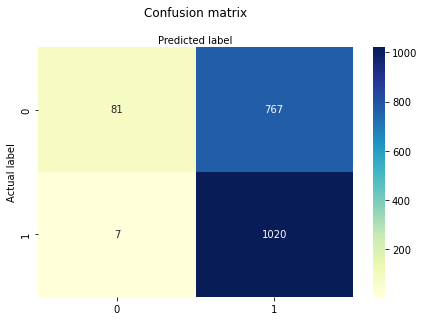

In [8]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

p value

In [9]:
p_value(X,y)

,Feature,p_value
0,outside area,0.000000e+00
1,SAM,2.518123e-14
2,SON,0.000000e+00
3,unknown,0.000000e+00
4,Other specialities,0.000000e+00
5,2,2.934509e-08
6,3+,1.456288e-01
7,HOSP,0.000000e+00
8,UCSP,1.476414e-02
9,USF,0.000000e+00


## Logistic regression text variables

In [28]:
#logistic regression text rows
data_no_text=data[data['text_length']>0]
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto']
X = data_no_text.drop(eliminate_cols,axis=1)# Features
y = data_no_text.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
y_df = pd.DataFrame(y_train)
distribution = y_df["result"].value_counts()
distribution

1    927
0    360
Name: result, dtype: int64

metrics

Accuracy: 0.5341614906832298
Recall: 0.5
Precision: 0.2670807453416149
              precision    recall  f1-score   support

     refused       0.00      0.00      0.00       150
    accepted       0.53      1.00      0.70       172

    accuracy                           0.53       322
   macro avg       0.27      0.50      0.35       322
weighted avg       0.29      0.53      0.37       322



c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-pa

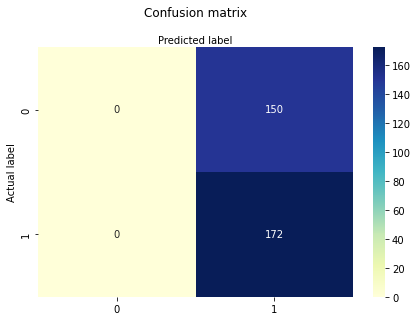

In [12]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

In [13]:
p_value(X,y)

,Feature,p_value
0,text_length,1.491237e-30
1,outside area,1.106719e-27
2,SAM,1.051842e-04
3,SON,7.611581e-04
4,unknown,2.499057e-31
5,Other specialities,4.704782e-23
6,2,4.632841e-02
7,3+,1.193271e-01
8,HOSP,8.572967e-34
9,UCSP,2.419156e-01


## Logistic without high p-value

In [32]:
#logistic regression text rows
data_no_text=data[data['text_length']>0]
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','UCSP','3+']
X = data_no_text.drop(eliminate_cols,axis=1)# Features
y = data_no_text.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df

,Feature,coefficients
0,text_length,0.001527
1,outside area,0.343076
2,SAM,0.423936
3,SON,0.030003
4,unknown,-1.045336
5,Other specialities,3.276852
6,2,0.196775
7,HOSP,-0.591398
8,USF,0.246955


Accuracy: 0.5341614906832298
Recall: 0.5
Precision: 0.2670807453416149


c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     refused       0.00      0.00      0.00       150
    accepted       0.53      1.00      0.70       172

    accuracy                           0.53       322
   macro avg       0.27      0.50      0.35       322
weighted avg       0.29      0.53      0.37       322



c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


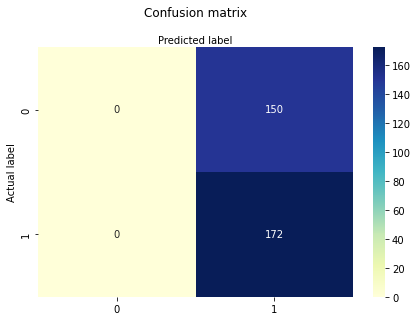

In [33]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)
# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))


In [34]:
p_value(X,y)


,Feature,p_value
0,text_length,1.491237e-30
1,outside area,1.106719e-27
2,SAM,1.051842e-04
3,SON,7.611581e-04
4,unknown,2.499057e-31
5,Other specialities,4.704782e-23
6,2,4.632841e-02
7,HOSP,8.572967e-34
8,USF,1.455616e-18
